# Smoothing - mencari parameter terbaik

proses smoothing bertujuan untuk mencari parameter terbaik yang menghasilkan akurasi tertinggi.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline

In [18]:
train = pd.read_csv('data_train_PNN_HIW.csv')
train.sample()

,id,att1,att2,att3,label
47,47,-1.90516,1.661945,0.999385,1


In [19]:
x_train = train[['att1', 'att2', 'att3']]
y_train = train['label']

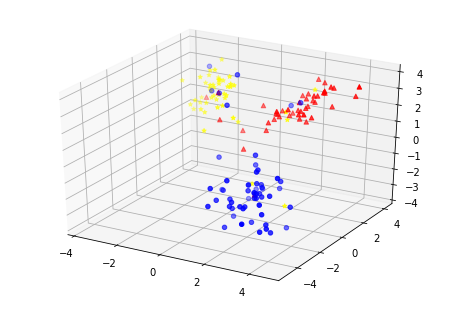

In [20]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x_train['att1'][y_train==0],x_train['att2'][y_train==0], x_train['att3'][y_train==0], marker='^', color='red')
ax.scatter(x_train['att1'][y_train==1],x_train['att2'][y_train==1], x_train['att3'][y_train==1], marker='*', color='yellow')
ax.scatter(x_train['att1'][y_train==2],x_train['att2'][y_train==2], x_train['att3'][y_train==2], marker='o', color='blue')

plt.show()

In [21]:
W = x_train.values
print('W = %s' % W)

#   Hubungkan unit pola pada unit penjumlah untuk kelas C_k yang sesuai
def sample_indexes_for_category(C_k):
    matching_samples_index = list(train[train.label == C_k].index)
    print('Samples untuk C_k=%s: %s' % (C_k, matching_samples_index))
    return matching_samples_index

C = train.label.unique() # tampilkan label- label yang unik (1, 2,3)
print('Classes: %s' % C)

W = [[  1.02677719e+00  -3.27903005e+00  -8.83643654e-01]
 [  1.62867253e+00  -3.21596985e+00  -3.15188850e+00]
 [  9.23109563e-01   1.85697976e-01  -3.08108933e+00]
 [  1.21061154e+00   2.91461725e-01  -2.44953665e+00]
 [  2.54433255e+00   1.33355971e+00   2.07864662e+00]
 [ -5.05070549e-01   1.87505100e+00   3.53770265e+00]
 [  2.56803014e+00   1.99309471e+00   1.38436603e+00]
 [  1.14591383e+00  -3.00759002e+00  -1.69514220e+00]
 [ -2.64269984e+00   2.61942917e+00   1.05704808e+00]
 [  2.96712606e+00   9.40226169e-01   2.33358158e+00]
 [  1.24128394e+00   1.92344920e+00   1.57132278e+00]
 [ -4.40388373e-01   1.47036628e+00   3.06779299e+00]
 [  3.22206734e+00   2.81004348e+00   3.33167047e+00]
 [  2.37801154e+00   1.86648918e+00   2.02562734e+00]
 [  2.40191917e+00  -2.38004847e+00  -2.99695694e+00]
 [  2.64983780e+00  -3.57318294e+00  -1.53205808e+00]
 [  1.64111152e+00  -3.03492631e+00  -3.42372116e-01]
 [  3.31212429e+00   2.78808071e+00   2.17958459e+00]
 [  3.32753249e+00  -2.9

In [22]:
# Tentukan konstanta |C_k| untuk setiap unit penjumlah
def count_label(C_k): return len(train[train.label == C_k])

C_count = [count_label(C_k) for C_k in C]
print('C_count: %s' % C_count)

C_count: [56, 46, 48]


In [23]:
# Tahap kedua:
# For setiap pola w_j
def find_d_j(j):
    # k = indeks kelas w_j
    C_k = train.label[j]
    k = np.where(C==C_k)[0][0]
    # Cari d_j : jarak dengan pola terdekat lain pada kelas k
    sample_indexes = sample_indexes_for_category(C_k)
    sample_indexes.remove(j)
    print('For W[%s]: C_k=%s k=%s. Sample indexes (other): %s' % (j, C_k, k, sample_indexes))
    d_j_list = [np.linalg.norm(W[j] - W[sample_index]) for sample_index in sample_indexes]
    d_j = np.amin(d_j_list) or 1.0
    print('d_j list: %s => d_j = %s' % (d_j_list, d_j))
    return d_j

find_d_j(0)
find_d_j(1)
find_d_j(5)


Samples untuk C_k=2: [0, 1, 2, 3, 5, 7, 14, 15, 16, 18, 22, 25, 27, 29, 35, 43, 52, 53, 54, 56, 62, 64, 66, 68, 69, 70, 71, 79, 83, 85, 88, 89, 90, 91, 92, 94, 98, 103, 109, 114, 115, 117, 120, 121, 122, 124, 125, 126, 129, 133, 135, 140, 143, 145, 147, 149]
For W[0]: C_k=2 k=0. Sample indexes (other): [1, 2, 3, 5, 7, 14, 15, 16, 18, 22, 25, 27, 29, 35, 43, 52, 53, 54, 56, 62, 64, 66, 68, 69, 70, 71, 79, 83, 85, 88, 89, 90, 91, 92, 94, 98, 103, 109, 114, 115, 117, 120, 121, 122, 124, 125, 126, 129, 133, 135, 140, 143, 145, 147, 149]
d_j list: [2.3475922329430485, 4.1041265523114872, 3.9031048452983668, 6.9612794859420379, 0.86394624682483623, 2.6768033909608451, 1.7723693063029391, 0.85438175700443297, 2.9195593537101945, 1.4828809881044049, 2.2861415466164376, 6.9115763726082617, 6.3359155468510036, 1.63205089463072, 2.1825413293697724, 3.1217975299993808, 3.8934087703475271, 3.3715640513349983, 3.21538940101108, 4.2290777811473097, 3.0473322278759136, 8.8532197198899372, 3.1148707875

1.4250856462479673

In [24]:
# d_tot[k] = d_tot[k] + d_j
def find_d_tot(C_k):
    return np.sum(find_d_j(j) for j in sample_indexes_for_category(C_k))

d_tot = np.array([find_d_tot(C_k) for C_k in C])
print('d_tot[0] = %s' % d_tot[0])
print('d_tot[1] = %s' % d_tot[1])
print('d_tot[2] = %s' % d_tot[2])

Samples untuk C_k=2: [0, 1, 2, 3, 5, 7, 14, 15, 16, 18, 22, 25, 27, 29, 35, 43, 52, 53, 54, 56, 62, 64, 66, 68, 69, 70, 71, 79, 83, 85, 88, 89, 90, 91, 92, 94, 98, 103, 109, 114, 115, 117, 120, 121, 122, 124, 125, 126, 129, 133, 135, 140, 143, 145, 147, 149]
Samples untuk C_k=2: [0, 1, 2, 3, 5, 7, 14, 15, 16, 18, 22, 25, 27, 29, 35, 43, 52, 53, 54, 56, 62, 64, 66, 68, 69, 70, 71, 79, 83, 85, 88, 89, 90, 91, 92, 94, 98, 103, 109, 114, 115, 117, 120, 121, 122, 124, 125, 126, 129, 133, 135, 140, 143, 145, 147, 149]
For W[0]: C_k=2 k=0. Sample indexes (other): [1, 2, 3, 5, 7, 14, 15, 16, 18, 22, 25, 27, 29, 35, 43, 52, 53, 54, 56, 62, 64, 66, 68, 69, 70, 71, 79, 83, 85, 88, 89, 90, 91, 92, 94, 98, 103, 109, 114, 115, 117, 120, 121, 122, 124, 125, 126, 129, 133, 135, 140, 143, 145, 147, 149]
d_j list: [2.3475922329430485, 4.1041265523114872, 3.9031048452983668, 6.9612794859420379, 0.86394624682483623, 2.6768033909608451, 1.7723693063029391, 0.85438175700443297, 2.9195593537101945, 1.4828809

d_j list: [2.2861415466164376, 3.4588973376295713, 3.4587750385690961, 2.9185726409241863, 5.6733916512070213, 2.3852841598223047, 2.9193054363763546, 2.5724372301387701, 1.7241221512134173, 3.0666108113953774, 2.0176296364163102, 5.9197697759884278, 5.2665933050372375, 1.6001439062875629, 1.4819091340708266, 3.4793257569894362, 2.4024426052531203, 1.7964250665244281, 3.0622653394461969, 3.6259898134195998, 1.1593599459831492, 7.8144083332003129, 3.7009296084520646, 1.9978182910894364, 2.6730677156428531, 1.3258668577434998, 2.8837813145102662, 4.6443397533241262, 2.2895406860108518, 2.3753849786649064, 0.78635522247459833, 3.8821601371303269, 3.0419302069380287, 3.5288555007484939, 2.5855777225355161, 3.2703132886339272, 3.9887257858557867, 1.2352368964410161, 1.7754842530476651, 1.0099258870065715, 1.5737131813672913, 2.1640209349424699, 1.4676982306122466, 1.6383005819416636, 1.6866539157568257, 2.788490590899102, 1.324213176713178, 2.3432041333179283, 1.5369482372055012, 2.14713219

Samples untuk C_k=2: [0, 1, 2, 3, 5, 7, 14, 15, 16, 18, 22, 25, 27, 29, 35, 43, 52, 53, 54, 56, 62, 64, 66, 68, 69, 70, 71, 79, 83, 85, 88, 89, 90, 91, 92, 94, 98, 103, 109, 114, 115, 117, 120, 121, 122, 124, 125, 126, 129, 133, 135, 140, 143, 145, 147, 149]
For W[120]: C_k=2 k=0. Sample indexes (other): [0, 1, 2, 3, 5, 7, 14, 15, 16, 18, 22, 25, 27, 29, 35, 43, 52, 53, 54, 56, 62, 64, 66, 68, 69, 70, 71, 79, 83, 85, 88, 89, 90, 91, 92, 94, 98, 103, 109, 114, 115, 117, 121, 122, 124, 125, 126, 129, 133, 135, 140, 143, 145, 147, 149]
d_j list: [1.1152166034799522, 1.5965874894367249, 3.7218494792298471, 3.5486322342031542, 7.5135086659632551, 0.74278651184102951, 1.6673855320193216, 0.91692349104059023, 1.2606825889020274, 1.807933084772757, 1.0292664158754314, 2.1640209349424699, 7.4814935398163813, 6.9119193745874732, 1.3678566208376981, 1.3585889348914242, 2.0863473098654191, 3.3471264956556404, 3.3105820912956854, 3.1630205359073207, 3.2384877017104179, 2.5001391861782172, 9.4112826

d_j list: [1.6478240128251544, 1.3483513634607081, 1.8860819900045653, 2.3250698617745229, 1.1558090245458781, 1.3212117285066303, 1.2173915762981036, 1.5797793960147981, 2.2235318212971706, 1.346411314610668, 0.84024746577691178, 1.4180762440167987, 0.99647833626986626, 2.4490297142674007, 1.9707114661407856, 2.4060176188033084, 1.0692135398768123, 1.4847262802398078, 2.2056645915230404, 2.9772018146651105, 1.8230953399623624, 0.75501917455446377, 1.1656307843972544, 4.6124157742864442, 0.88055342788697311, 1.9497148462284295, 1.1561789151895967, 2.059530765478951, 4.3110372761352487, 6.38839993998943, 1.4431945728310585, 2.2931202932144736, 0.99776400698343726, 1.3854090660296257, 1.0315542374209792, 5.54238538192521, 1.4626389393406818, 4.6418967034604366, 1.153882993137336, 2.2527159804856627, 1.5401241462690283, 3.9832496610310262, 1.806264112182536, 2.8817382739202189, 2.7352360849997712] => d_j = 0.755019174554
Samples untuk C_k=0: [4, 6, 9, 10, 12, 13, 17, 19, 33, 34, 36, 37, 3

Samples untuk C_k=1: [8, 11, 20, 21, 23, 24, 26, 28, 30, 31, 32, 41, 42, 44, 46, 47, 55, 59, 60, 67, 73, 74, 75, 78, 81, 82, 87, 95, 96, 97, 99, 100, 102, 105, 107, 110, 112, 113, 116, 119, 130, 131, 132, 134, 136, 138, 139, 141]
For W[105]: C_k=1 k=2. Sample indexes (other): [8, 11, 20, 21, 23, 24, 26, 28, 30, 31, 32, 41, 42, 44, 46, 47, 55, 59, 60, 67, 73, 74, 75, 78, 81, 82, 87, 95, 96, 97, 99, 100, 102, 107, 110, 112, 113, 116, 119, 130, 131, 132, 134, 136, 138, 139, 141]
d_j list: [2.3591022862408462, 0.87904330165674027, 0.26478463509098554, 0.92013399206865065, 0.94379342750168116, 1.7911145317147597, 2.3552582055255904, 3.0023790713133294, 3.682680127455753, 1.1961225286060995, 0.94235611965943089, 5.2454262305196151, 2.3613391846379854, 0.85840092706082105, 2.1966874079729286, 1.6687333149780434, 1.7366600772694423, 1.2960443879370613, 1.9382068551593843, 2.815234311835201, 7.0500564178772445, 2.2827480761672581, 1.7577071530852022, 0.52811677700679682, 2.67979869661619, 3.107

In [25]:
g = 0.05 #gunakan g yang menghasilkan sigmas dengan akurasi tertinggi, nilai g brute force dari 0 -1

d_avg = d_tot / C_count
print('d_avg = %s' % d_avg)

#   sigma_k = g . d_avg[k]
sigmas = g * d_avg
print('sigmas = %s' % sigmas)

d_avg = [ 0.77793517  0.60224695  0.6473971 ]
sigmas = [ 0.03889676  0.03011235  0.03236986]


In [26]:
def gaussian_pdf(x, sigma, w):
    return math.exp( -(x - w)**2 / (2 * sigma**2) )

# Memvisualisasikan sigma yang didapatkan untuk masing- masing label

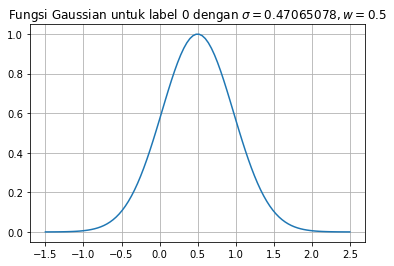

In [27]:
sigma = 0.47065078
w = 0.5
x = np.linspace(w - 2, w + 2, 100)
fig = plt.figure('Fungsi Gaussian')
ax = fig.add_subplot(111)
ax.set_title('Fungsi Gaussian untuk label 0 dengan $\sigma = %s, w = %s$' % (sigma, w))
ax.grid(which='major')
ax.plot(x, [gaussian_pdf(_, sigma, w) for _ in x])
plt.show()

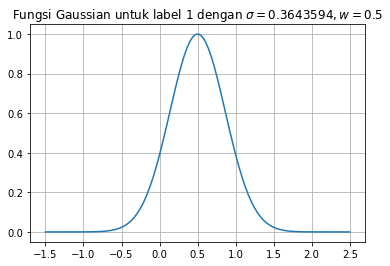

In [28]:
sigma = 0.3643594
w = 0.5
x = np.linspace(w - 2, w + 2, 100)
fig = plt.figure('Fungsi Gaussian')
ax = fig.add_subplot(111)
ax.set_title('Fungsi Gaussian untuk label 1 dengan $\sigma = %s, w = %s$' % (sigma, w))
ax.grid(which='major')
ax.plot(x, [gaussian_pdf(_, sigma, w) for _ in x])
plt.show()

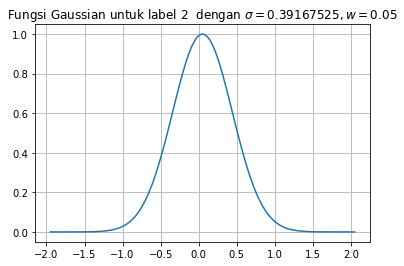

In [31]:
sigma = 0.39167525
w = 0.05
x = np.linspace(w - 2, w + 2, 100)
fig = plt.figure('Fungsi Gaussian')
ax = fig.add_subplot(111)
ax.set_title('Fungsi Gaussian untuk label 2  dengan $\sigma = %s, w = %s$' % (sigma, w))
ax.grid(which='major')
ax.plot(x, [gaussian_pdf(_, sigma, w) for _ in x])
plt.show()

# Kemudian diambil nilai maksimum dari sigma yang dihasilkan

In [30]:
max(sigmas)

0.03889675868182537